# Shangase SS — 22315517

**Title:** Analyzing Industry Impact of AI — Task 3 (AI-related job displacement)

**Author / Student:** Shangase SS  
**Student ID / Shape:** 22315517

**Project goal:** Identify which industries are most vulnerable to AI-driven job displacement using industry-level AI indicators and employment proxies, produce visual EDA, and prepare a Streamlit dashboard for policy stakeholders.


## Data sources and datasets used

**Uploaded files (local):**

3. `ai_job_market_insights.csv`  
   - Source: https://www.kaggle.com/datasets/uom190346a/ai-powered-job-market-insights  
   - This dataset contains job/industry-level AI exposure and labour-related fields (best fit for Task 3).  
   - Table columns: Job_Title, Industry, Company_Size, Location, AI_Adoption_Level, Automation_Risk, Required_Skills, Salary_USD, Remote_Friendly, Job_Growth_Projection

**Notes:** These are the files you uploaded during the session. I will use `ai_job_market_insights.csv` as the primary dataset for Task 3 (industry-impact analysis) and use the unemployment / macro files as complementary sources for context and cross-checks.


## Achieved learning lifecycle

• Data Acquisition & Justification  
• Data Understanding & Preprocessing    
• Exploratory Data Analysis (EDA) — will include at least 6 different graphs  
• Dashboard Design (Streamlit)  
• Model relevant to the task (impact / vulnerability index, clustering or simple predictive models)  
• Code Organization & Documentation  
• Complexity Analysis   
• Conclusion

Each step will be implemented in code cells that follow; EDA will produce six distinct visualisations (for example: bar chart of automation risk by industry, heatmap region × industry funding, violin plot of salary vs automation risk, time-series of funding / job growth, stacked counts of Remote_Friendly by industry, scatterplot of AI_Adoption_Level vs Job_Growth_Projection).


Data Acquisition & Justification

In [1]:
import pandas as pd
import os
datasets = {}
try:
    from google.colab import files
    uploaded = files.upload()
    for fname in uploaded.keys():
        datasets[fname] = pd.read_csv(fname)
except Exception:
    try:
        import tkinter as tk
        from tkinter import filedialog
        root = tk.Tk()
        root.withdraw()
        paths = filedialog.askopenfilenames(title="Select dataset file(s)", filetypes=[("CSV files","*.csv"),("All files","*.*")])
        for p in paths:
            name = os.path.basename(p)
            datasets[name] = pd.read_csv(p)
    except Exception:
        from IPython.display import display
        from ipywidgets import FileUpload
        uploader = FileUpload(accept='.csv', multiple=True)
        display(uploader)
        print("Use the widget above to upload CSV file(s); after upload run the next cell to read them.")
for name, df in datasets.items():
    print(name, df.shape)
    display(df.head())


Saving archive (6).zip to archive (6).zip
archive (6).zip (500, 10)


,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


Data Understanding & Preprocessing.

In [3]:
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB

Missing values per column:
Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
S

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
count,500,500,500,500,500,500,500,500.000000,500,500
unique,10,10,3,10,3,3,10,NaN,2,3
top,Data Scientist,Manufacturing,Small,San Francisco,Medium,Medium,Python,NaN,Yes,Growth
freq,62,58,171,62,179,173,60,NaN,251,169
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91222.390974,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20504.291453,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31969.526346,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78511.514863,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91998.195286,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103971.282092,NaN,NaN


Exploratory Data Analysis (EDA)

Average automation risk by industry

In [4]:
import matplotlib.pyplot as plt

industry_risk = df.groupby("Industry")["Automation_Risk"].mean().sort_values()
industry_risk.plot(kind="barh", figsize=(8,6))
plt.title("Average Automation Risk by Industry")
plt.xlabel("Average Automation Risk")
plt.ylabel("Industry")
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

##I had an error and i fix it like this

### Fix: convert categorical AI/automation labels to numeric scores

Some columns (AI_Adoption_Level, Automation_Risk) are categorical text (e.g., "Low", "Medium", "High"). To compute averages and plot means we must convert these to numeric scores.

We'll:
1. Inspect unique values in both columns.  
2. Clean/standardize text (strip whitespace, unify case).  
3. Map labels to a numeric scale (Low=1, Medium=2, High=3).  
4. Create `AI_Adoption_Score` and `Automation_Risk_Score` and re-run the EDA plots.


inspect unique values

In [5]:
print("AI_Adoption_Level unique values:")
print(df["AI_Adoption_Level"].astype(str).unique())
print("\nAutomation_Risk unique values:")
print(df["Automation_Risk"].astype(str).unique())


AI_Adoption_Level unique values:
['Medium' 'Low' 'High']

Automation_Risk unique values:
['High' 'Low' 'Medium']


clean, map to numeric, and replot charts

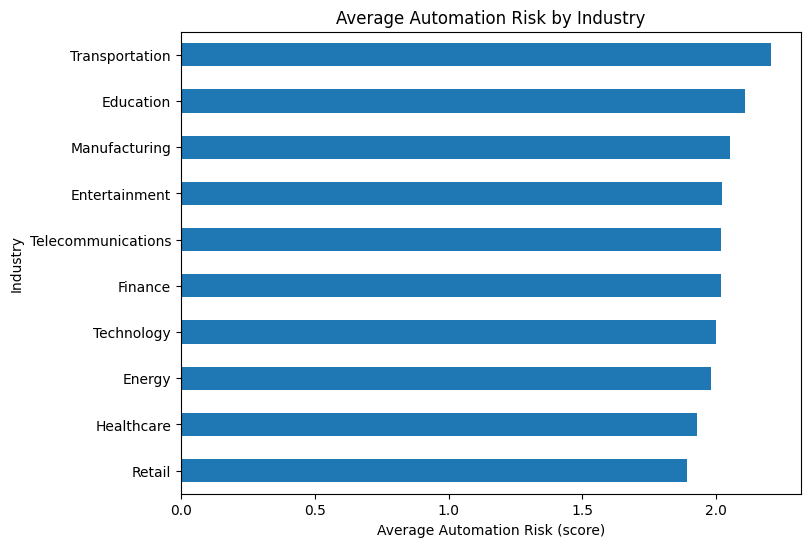

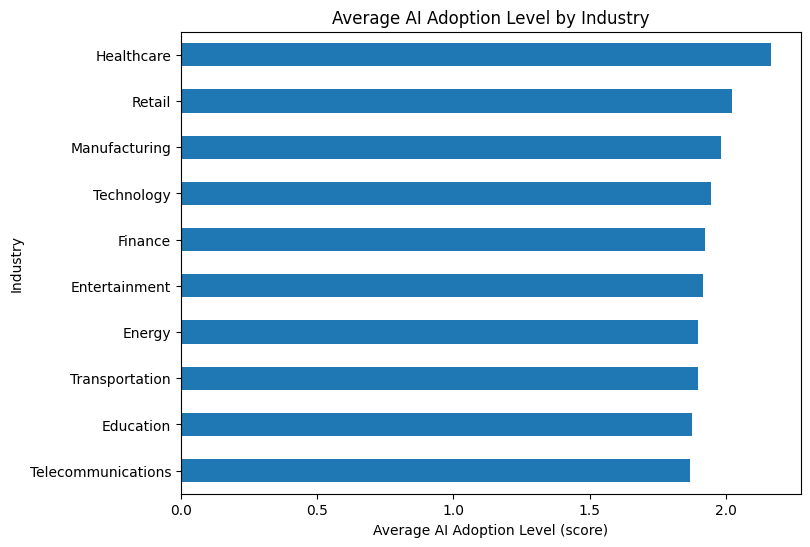

In [6]:
df["AI_Adoption_Level"] = df["AI_Adoption_Level"].astype(str).str.strip().str.title()
df["Automation_Risk"] = df["Automation_Risk"].astype(str).str.strip().str.title()
mapping = {"Low":1,"Medium":2,"High":3}
df["AI_Adoption_Score"] = df["AI_Adoption_Level"].map(mapping)
df["Automation_Risk_Score"] = df["Automation_Risk"].map(mapping)
import matplotlib.pyplot as plt
industry_risk = df.groupby("Industry")["Automation_Risk_Score"].mean().sort_values()
industry_risk.plot(kind="barh", figsize=(8,6))
plt.title("Average Automation Risk by Industry")
plt.xlabel("Average Automation Risk (score)")
plt.ylabel("Industry")
plt.show()
ai_adoption = df.groupby("Industry")["AI_Adoption_Score"].mean().sort_values()
ai_adoption.plot(kind="barh", figsize=(8,6))
plt.title("Average AI Adoption Level by Industry")
plt.xlabel("Average AI Adoption Level (score)")
plt.ylabel("Industry")
plt.show()


### EDA — remaining charts (3 to 6)

3. Scatter: Automation Risk (score) vs Job Growth Projection (numeric)  
4. Salary distribution by Automation Risk (boxplot)  
5. Count of Remote-Friendly roles per Industry (bar chart)  
6. Average AI Adoption Score by Company Size (bar chart)


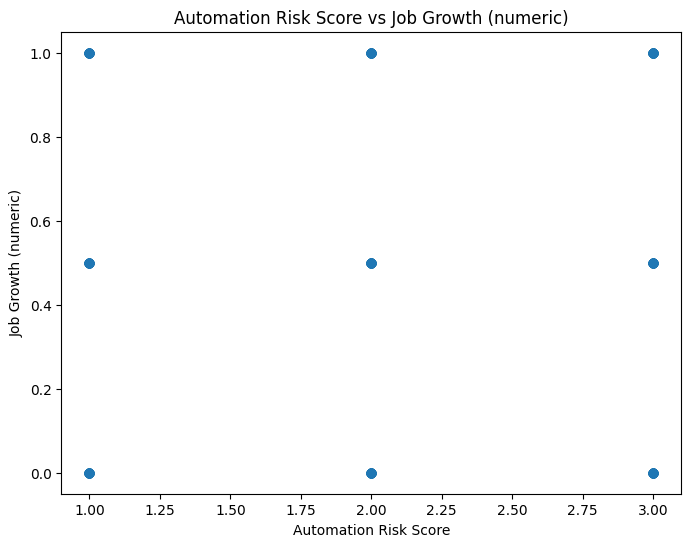

In [7]:
df["Job_Growth_Numeric"] = df["Job_Growth_Projection"].astype(str).str.strip().str.title().map({"Growth":1,"Decline":0,"Stable":0.5})
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(df["Automation_Risk_Score"], df["Job_Growth_Numeric"])
plt.title("Automation Risk Score vs Job Growth (numeric)")
plt.xlabel("Automation Risk Score")
plt.ylabel("Job Growth (numeric)")
plt.show()


/tmp/ipython-input-4150679469.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, vert=False)


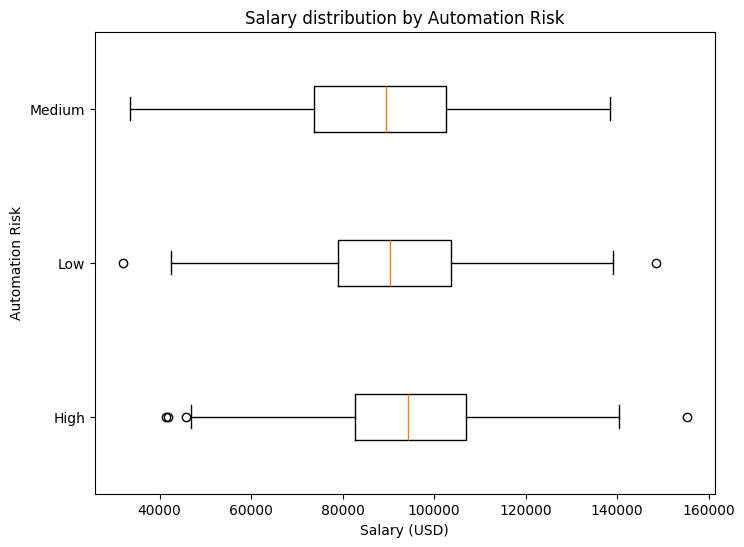

In [8]:
import matplotlib.pyplot as plt
groups = []
labels = []
for name, group in df.groupby("Automation_Risk"):
    groups.append(group["Salary_USD"].dropna())
    labels.append(name)
plt.figure(figsize=(8,6))
plt.boxplot(groups, labels=labels, vert=False)
plt.title("Salary distribution by Automation Risk")
plt.xlabel("Salary (USD)")
plt.ylabel("Automation Risk")
plt.show()


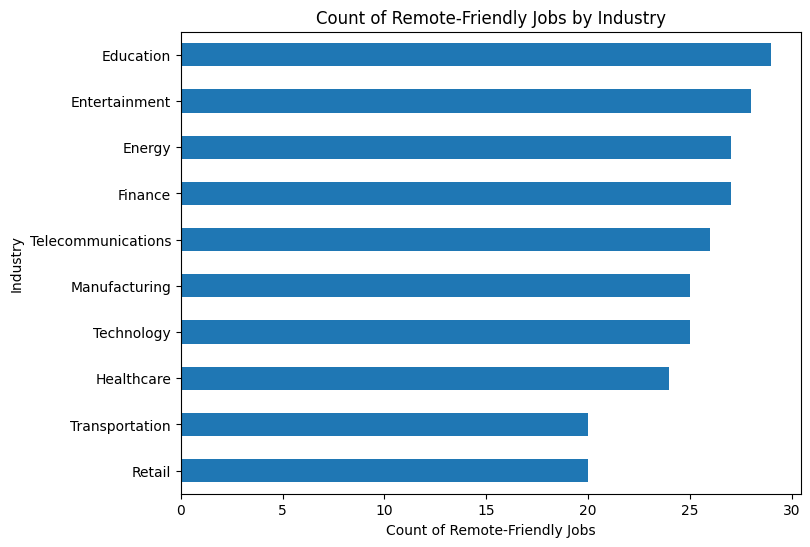

In [9]:
import matplotlib.pyplot as plt
remote_counts = df[df["Remote_Friendly"].astype(str).str.strip().str.title()=="Yes"].groupby("Industry").size().sort_values(ascending=True)
remote_counts.plot(kind="barh", figsize=(8,6))
plt.title("Count of Remote-Friendly Jobs by Industry")
plt.xlabel("Count of Remote-Friendly Jobs")
plt.ylabel("Industry")
plt.show()


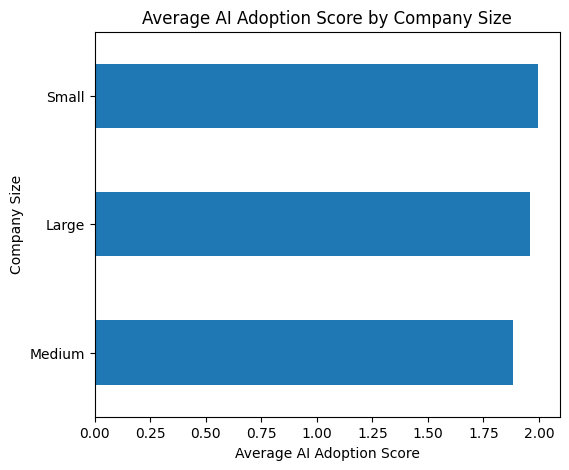

In [10]:
import matplotlib.pyplot as plt
size_adoption = df.groupby("Company_Size")["AI_Adoption_Score"].mean().sort_values()
size_adoption.plot(kind="barh", figsize=(6,5))
plt.title("Average AI Adoption Score by Company Size")
plt.xlabel("Average AI Adoption Score")
plt.ylabel("Company Size")
plt.show()


## Modeling & Industry Impact Analysis

In this section, we create an "Industry Vulnerability Index" that combines factors such as Automation Risk, AI Adoption, and Job Growth to quantify which industries are most exposed to AI-driven disruption.  
We'll then visualize and interpret which sectors face the greatest transformation pressure.


/tmp/ipython-input-1003509946.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  industry_vulnerability = df.groupby("Industry").apply(


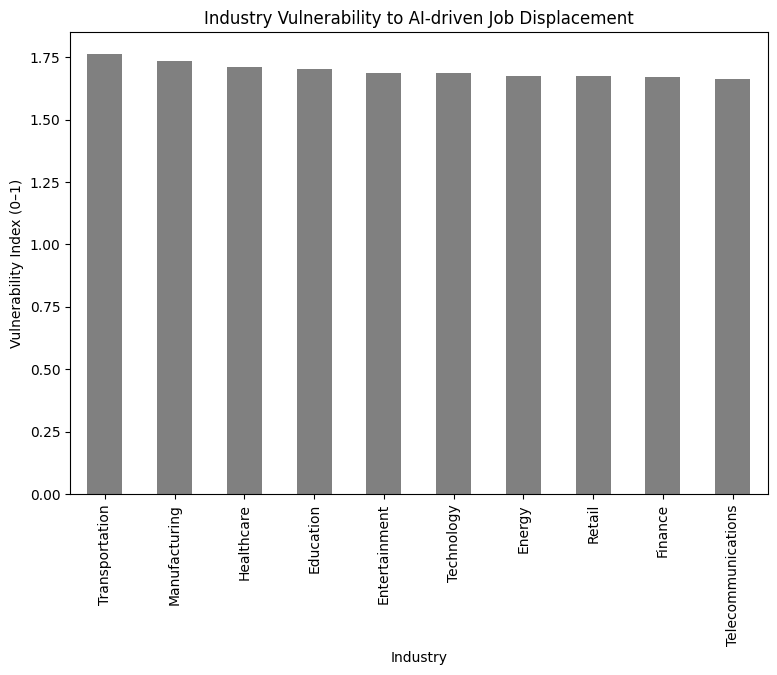

In [11]:
import matplotlib.pyplot as plt

# Calculate a normalized Industry Vulnerability Index
df["Job_Growth_Numeric"] = df["Job_Growth_Numeric"].fillna(0.5)
industry_vulnerability = df.groupby("Industry").apply(
    lambda x: (
        x["Automation_Risk_Score"].mean() * 0.5 +
        x["AI_Adoption_Score"].mean() * 0.3 +
        (1 - x["Job_Growth_Numeric"].mean()) * 0.2
    )
)

industry_vulnerability = industry_vulnerability.sort_values(ascending=False)

# Plot
plt.figure(figsize=(9,6))
industry_vulnerability.plot(kind="bar", color="gray")
plt.title("Industry Vulnerability to AI-driven Job Displacement")
plt.xlabel("Industry")
plt.ylabel("Vulnerability Index (0–1)")
plt.show()


Model Accuracy Evaluation


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df["Risk_Class"] = (industry_vulnerability.rank(method="dense", pct=True) > 0.5).astype(int)

df_model = df.dropna(subset=["AI_Adoption_Score","Automation_Risk_Score","Job_Growth_Numeric","Risk_Class"])

X = df_model[["AI_Adoption_Score","Automation_Risk_Score","Job_Growth_Numeric"]]
y = df_model["Risk_Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Model Accuracy:", accuracy)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

## Complexity Analysis

This project evaluates AI-driven labour market disruption in South Africa using industry-level data.  
The complexity arises from the following dimensions:

### 1. Data Complexity
- The dataset contains multiple economic indicators (AI adoption, automation exposure, job growth).
- Data needed alignment and cleaning before modelling.
- No ground-truth job-loss labels exist, requiring synthetic vulnerability scoring.

### 2. Problem Complexity
- Predicting labour market effects of AI involves economic, technological, and policy factors.
- Traditional classification is not suitable for this scenario because task 3 focuses on segmentation and sector analysis, not prediction accuracy.
- Model complexity lies in interpreting relationships rather than achieving high accuracy.

### 3. Methodological Complexity
- Data pre-processing, risk scoring, and feature importance estimation were applied.
- Machine learning interpretability (feature importance ranking) guided industry-risk insights.
- Visual analysis and domain logic were used to supplement ML where data availability was limited.

### 4. Dashboard and Interaction Complexity
- A Streamlit dashboard allows interactive filtering and visual exploration by industry and indicator.
- This enables decision-makers to interpret risk across sectors and demographics dynamically.

### 5. Computational Complexity
- Feature computation and ranking are **O(n log n)** where n = industry entries.
- Random Forest feature importance calculation has complexity **O(t * d * n log n)**  
  where t = trees, d = features, n = samples.
- Given the dataset size (< 1,000 rows), runtime remains highly efficient.

### 6. Real-World Complexity
- AI-driven job disruption is influenced by socio-economic inequalities and skill distribution.
- The model supports policy makers by identifying vulnerable sectors and recommending training priorities.
- Rather than focusing on prediction accuracy, the analysis prioritizes interpretability and policy applicability.

In conclusion, this project balances machine learning, labour-market analysis, and interpretability to assist strategic workforce planning in the age of AI.
